# Assignment: Exploring Data

Hi,

The marketing team would like to share out the five happiest countries of the 2010s on social media.
I’ve attached a notebook that another data scientist started with happiness data inside. I would recommend:
* Creating a list of each country’s highest happiness score, and then sorting it from happiest to least happy country
* Creating a list of each country’s average happiness score, and then sorting it from happiest to least happy country

Are there any differences between the two lists?

Thanks!\
Anna

## Read in the data

In [1]:
# import the data 

import pandas as pd

df = pd.read_csv('../Data/happiness_survey_data.csv')
df.head()

,country_name,year,happiness_score,social_support,freedom_to_make_life_choices,healthy_life_expectancy_at_birth
0,Afghanistan,2008,3.723590,0.450662,0.718114,50.500000
1,Afghanistan,2009,4.401778,0.552308,0.678896,50.799999
2,Afghanistan,2010,4.758381,0.539075,0.600127,51.099998
3,Afghanistan,2011,3.831719,0.521104,0.495901,51.400002
4,Afghanistan,2012,3.782938,0.520637,0.530935,51.700001


In [2]:
# there are 2089 rows and 6 columns of data
df.shape

(2089, 6)

In [27]:
# the years range from 2005 - 2021
# happiness scores range from 2 - 8
df.describe(include = 'all')

,country_name,year,happiness_score,social_support,freedom_to_make_life_choices,healthy_life_expectancy_at_birth
count,2089,2089.000000,2089.000000,2076.000000,2057.000000,2031.000000
unique,166,NaN,NaN,NaN,NaN,NaN
top,Zimbabwe,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,NaN,NaN,NaN,NaN
mean,NaN,2013.727621,5.473747,0.811542,0.745462,63.180326
std,NaN,4.455614,1.115567,0.118935,0.140751,6.948546
min,NaN,2005.000000,2.178809,0.290184,0.257534,6.720000
25%,NaN,2010.000000,4.651972,0.747664,0.651689,58.965000
50%,NaN,2014.000000,5.405246,0.834770,0.767357,64.980003
75%,NaN,2017.000000,6.294282,0.904682,0.857677,68.362499


## Explore the data

In [29]:
# Filter out any data before 2010 and after 2019
mask = (df.year >= 2010) & (df.year < 2020)
filtered_df = df.loc[mask]
filtered_df.head()

,country_name,year,happiness_score,social_support,freedom_to_make_life_choices,healthy_life_expectancy_at_birth
2,Afghanistan,2010,4.758381,0.539075,0.600127,51.099998
3,Afghanistan,2011,3.831719,0.521104,0.495901,51.400002
4,Afghanistan,2012,3.782938,0.520637,0.530935,51.700001
5,Afghanistan,2013,3.572100,0.483552,0.577955,52.000000
6,Afghanistan,2014,3.130896,0.525568,0.508514,52.299999


In [36]:
# Group the data by country and calculate the maximum happiness score for each one
(filtered_df.groupby('country_name')['happiness_score']
 .max()
 .round(2)
 .reset_index()
 .sort_values('happiness_score', ascending = False)
 .head(5)
)

,country_name,happiness_score
47,Finland,7.86
38,Denmark,7.79
141,Switzerland,7.78
110,Norway,7.68
25,Canada,7.65


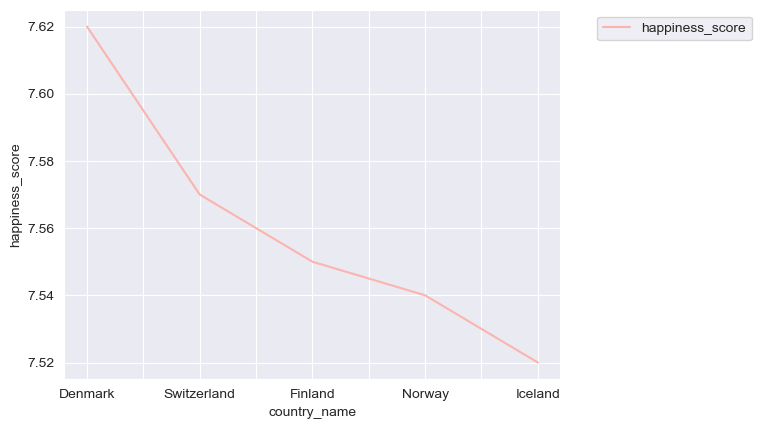

In [59]:
# Group the data by country and calculate the average happiness score for each one
# Group the data by country and calculate the maximum happiness score for each one
(filtered_df.groupby('country_name')['happiness_score']
 .mean()
 .round(2)
 .sort_values(ascending = False)
).head(5).plot(kind = 'line', 
              xlabel = 'country_name',
              ylabel = 'happiness_score',
               cmap  = 'Pastel1'
              ).legend(bbox_to_anchor = (1.4,1));

In [37]:
import seaborn as sns

In [38]:
sns.set_style('darkgrid')